# Carga de datos y descarga de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Datos_SenecaféAlpes.csv', sep=';')


# Exploración del dataset

In [2]:
display(df.head())
print("Dimensiones:", df.shape)
display(df.dtypes)
display(df.describe())

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Dimensiones: (14291, 19)


ID                      object
Area                     int64
Perimetro              float64
LongitudEjeMayor       float64
LongitudEjeMenor       float64
RelacionAspecto         object
Excentricidad          float64
AreaConvexa            float64
DiametroEquivalente    float64
Medida                 float64
Solidez                float64
Redondez               float64
Compacidad             float64
FactorForma1           float64
FactorForma2           float64
FactorForma3           float64
FactorForma4           float64
DefectoVisible          object
MétodoSecado            object
dtype: object

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

In [4]:
print(df.isnull().sum())

ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64


In [5]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", numericas.tolist())
categoricas = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categoricas.tolist())

Columnas numéricas: ['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4']
Columnas categóricas: ['ID', 'RelacionAspecto', 'DefectoVisible', 'MétodoSecado']


## Observar el comportamiento del dataset eliminando todos los nulos

In [6]:
dfEliminando = df.copy()

In [7]:
dfEliminando = dfEliminando.dropna()
dfEliminando.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3603 entries, 2 to 14287
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3603 non-null   object 
 1   Area                 3603 non-null   int64  
 2   Perimetro            3603 non-null   float64
 3   LongitudEjeMayor     3603 non-null   float64
 4   LongitudEjeMenor     3603 non-null   float64
 5   RelacionAspecto      3603 non-null   object 
 6   Excentricidad        3603 non-null   float64
 7   AreaConvexa          3603 non-null   float64
 8   DiametroEquivalente  3603 non-null   float64
 9   Medida               3603 non-null   float64
 10  Solidez              3603 non-null   float64
 11  Redondez             3603 non-null   float64
 12  Compacidad           3603 non-null   float64
 13  FactorForma1         3603 non-null   float64
 14  FactorForma2         3603 non-null   float64
 15  FactorForma3         3603 non-null   float

In [8]:
print(dfEliminando.isnull().sum())

ID                     0
Area                   0
Perimetro              0
LongitudEjeMayor       0
LongitudEjeMenor       0
RelacionAspecto        0
Excentricidad          0
AreaConvexa            0
DiametroEquivalente    0
Medida                 0
Solidez                0
Redondez               0
Compacidad             0
FactorForma1           0
FactorForma2           0
FactorForma3           0
FactorForma4           0
DefectoVisible         0
MétodoSecado           0
dtype: int64


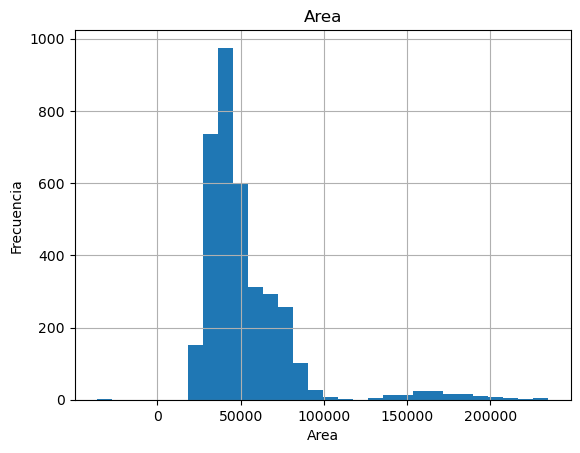

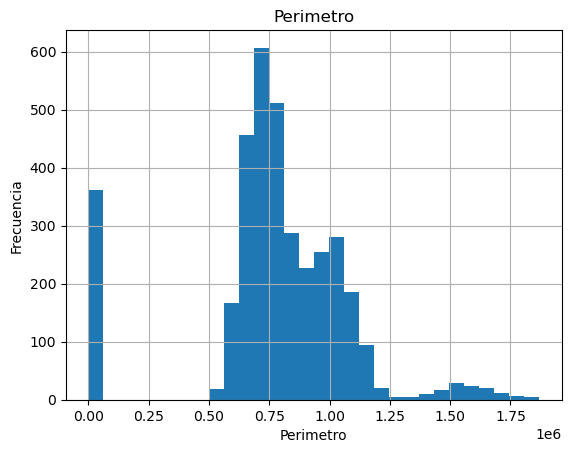

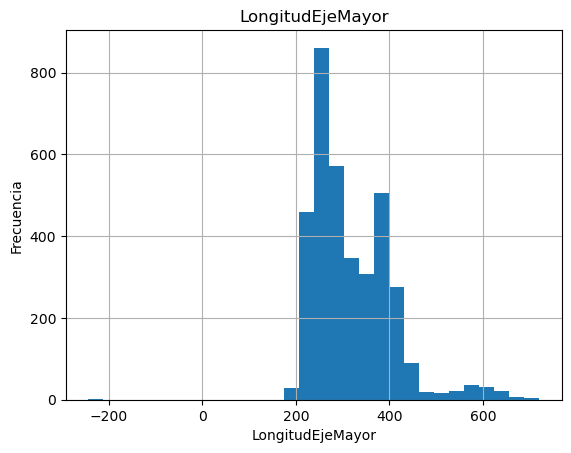

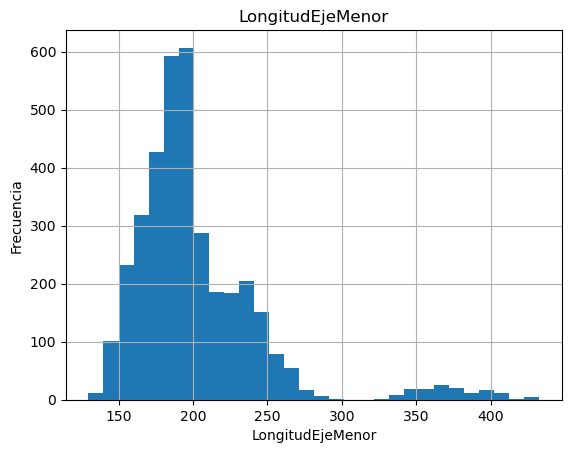

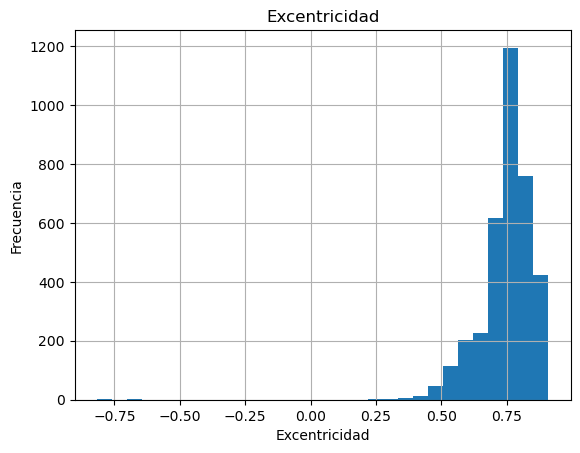

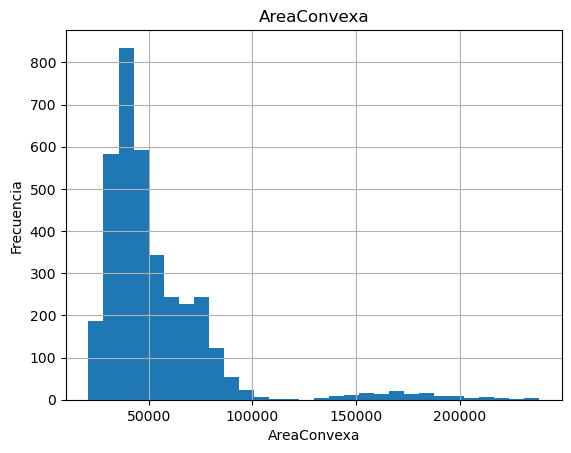

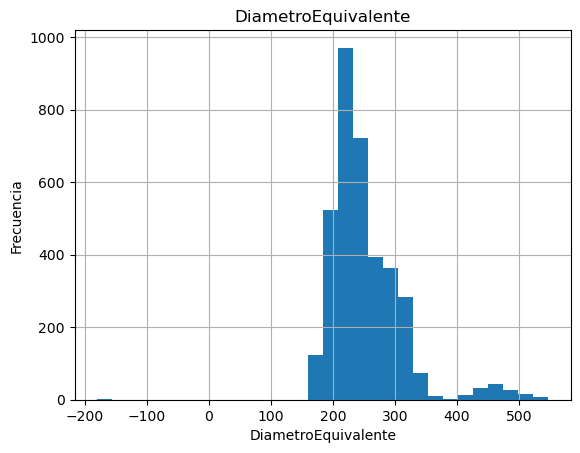

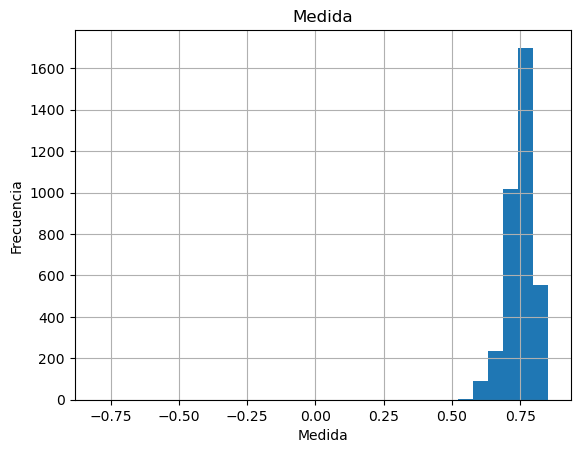

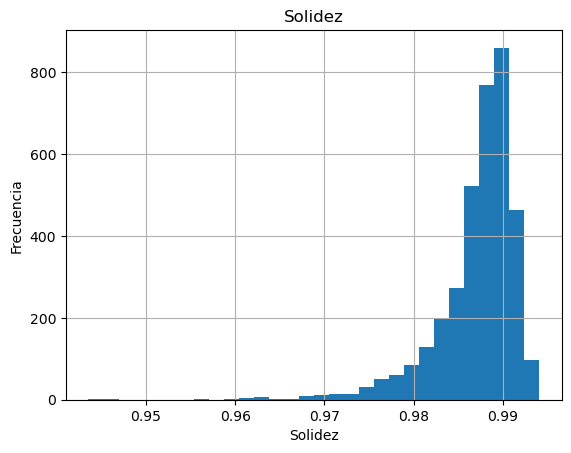

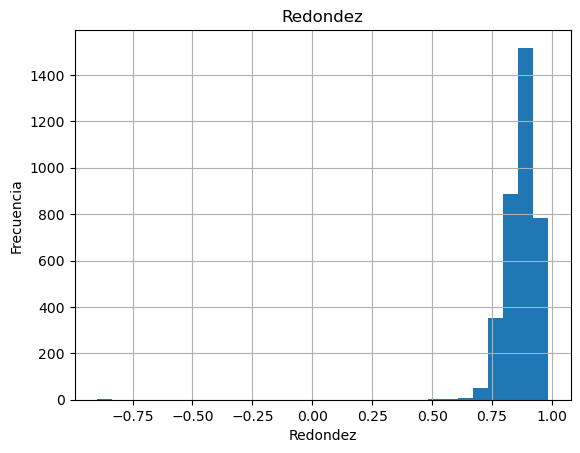

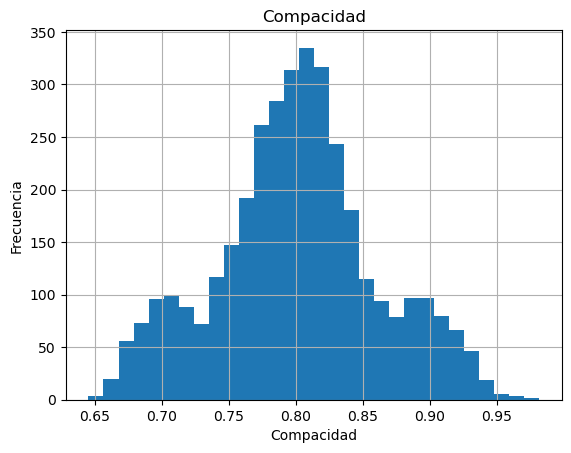

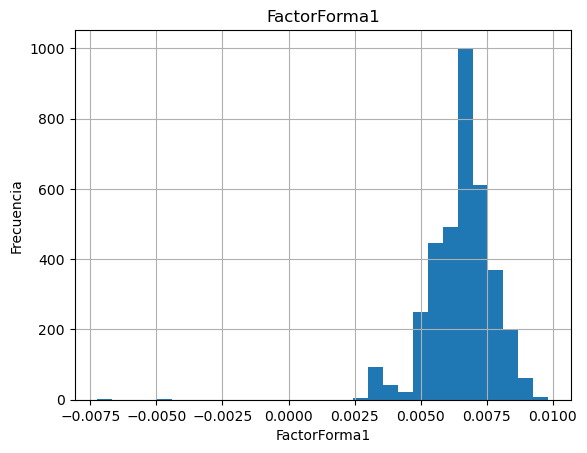

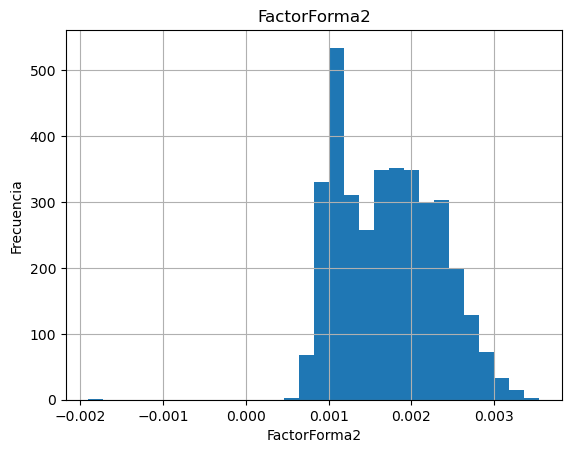

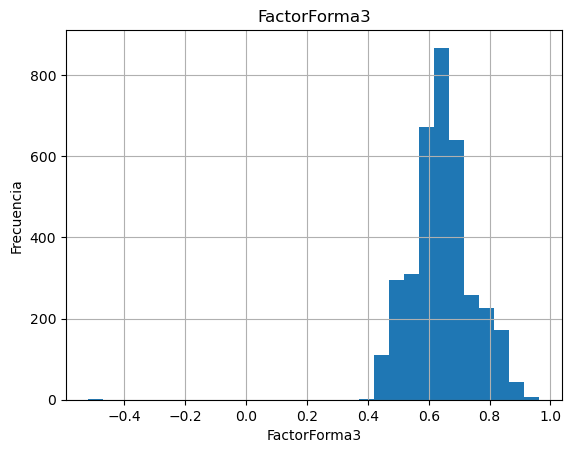

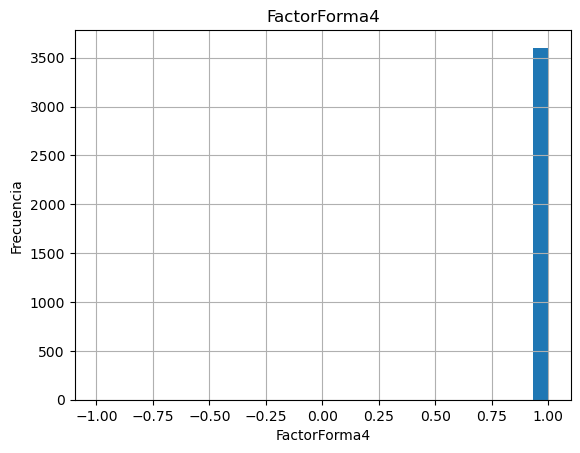

In [9]:
for c in dfEliminando.columns:
    if c in dfEliminando[numericas] and c != 'ID':
        dfEliminando[c].hist(bins=30)
        plt.title(c)
        plt.xlabel(c)
        plt.ylabel('Frecuencia')
        plt.show()

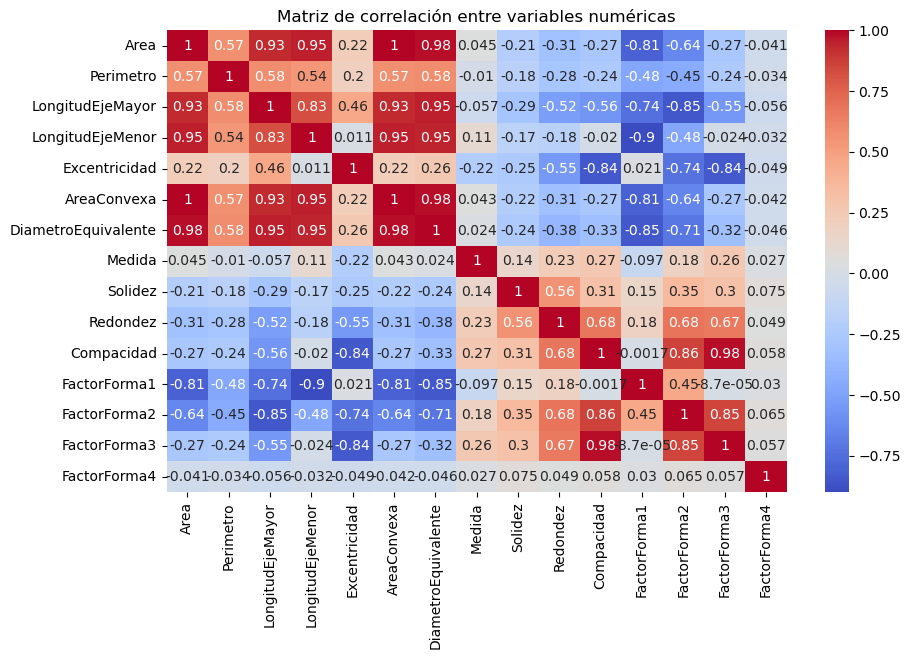

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = dfEliminando[numericas].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

### Muchos datos eliminados, perdida de información importante par el modelo

## Observar el comportamiento del dataset realizando imputación de datos

In [16]:
dfPlots = df.copy()

In [17]:
for c in numericas:
    if c in dfPlots.columns:
        if dfPlots[c].isnull().sum() < dfPlots.shape[0] * 0.2:
            dfPlots[c].fillna(dfPlots[c].median(), inplace=True)
print(dfPlots.isnull().sum())

ID                        0
Area                      0
Perimetro                 0
LongitudEjeMayor          0
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad             0
AreaConvexa               0
DiametroEquivalente       0
Medida                    0
Solidez                   0
Redondez                  0
Compacidad                0
FactorForma1              0
FactorForma2              0
FactorForma3              0
FactorForma4              0
DefectoVisible         2935
MétodoSecado            587
dtype: int64


C:\Users\santi\AppData\Local\Temp\ipykernel_8420\729992208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfPlots[c].fillna(dfPlots[c].median(), inplace=True)


In [18]:
noNulas = [c for c in dfPlots.columns if dfPlots[c].isnull().sum() == 0]
noNulas = noNulas[1:]
dfPlots = dfPlots[noNulas]
print(dfPlots.head())

    Area  Perimetro  LongitudEjeMayor  LongitudEjeMenor  Excentricidad  \
0  50836   923618.0        358.515147        181.388899       0.764392   
1  62764  1003767.0        409.207082        198.330199       0.764392   
2  59965   994266.0        389.088529        197.967275       0.860886   
3  55035      917.6        379.346822        185.390577       0.872446   
4  39324   737773.0        262.520242        191.176858       0.685326   

   AreaConvexa  DiametroEquivalente    Medida   Solidez  Redondez  Compacidad  \
0      45107.5           254.413847  0.804762  0.983840  0.748853    0.709632   
1      64158.0           282.689948  0.703995  0.978272  0.782807    0.690824   
2      60910.0           276.314692  0.661581  0.984485  0.762259    0.710159   
3      55591.0           238.579492  0.799695  0.989998  0.821376    0.697811   
4      39758.0           223.760747  0.775392  0.989084  0.907867    0.852356   

   FactorForma1  FactorForma2  FactorForma3  FactorForma4  
0      0

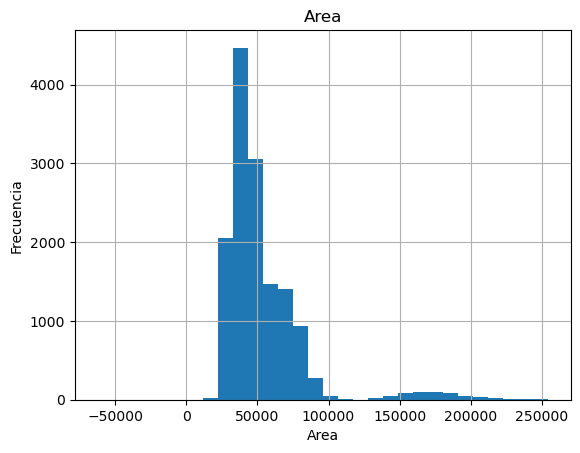

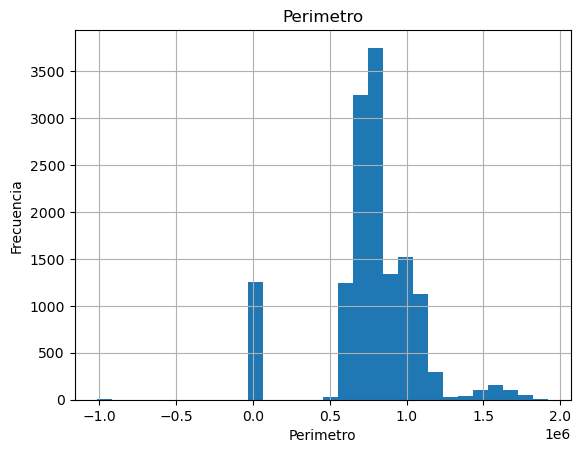

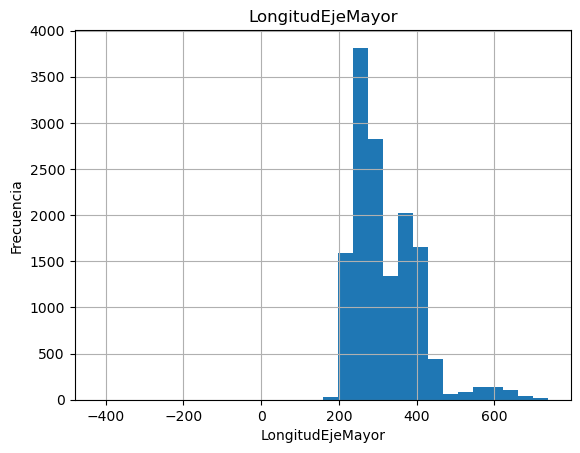

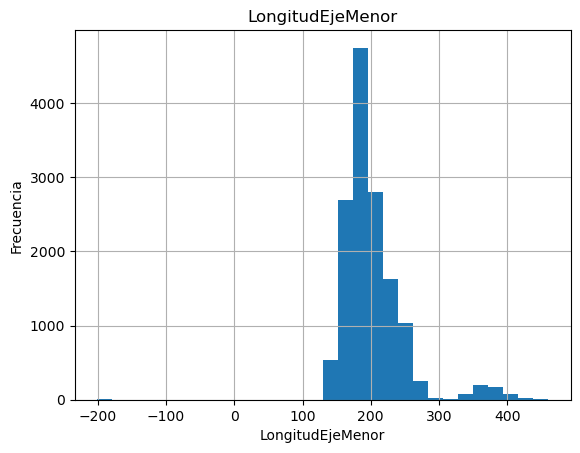

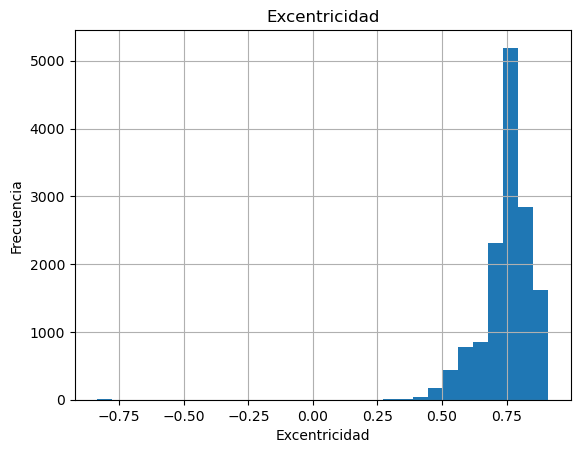

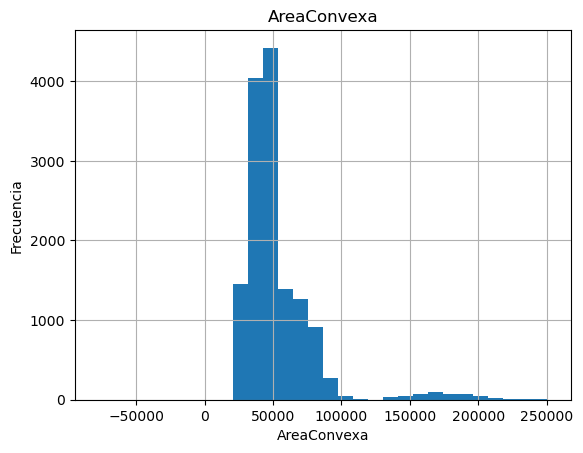

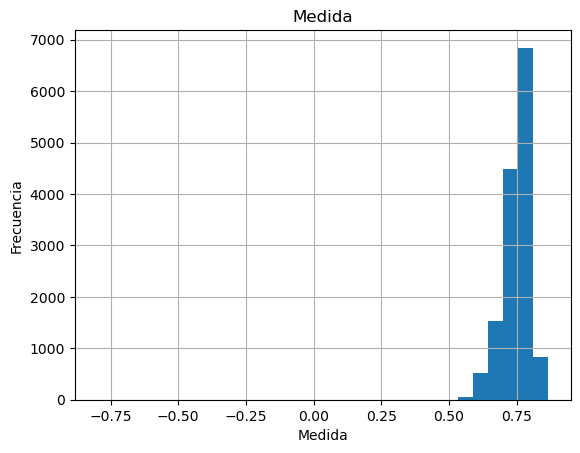

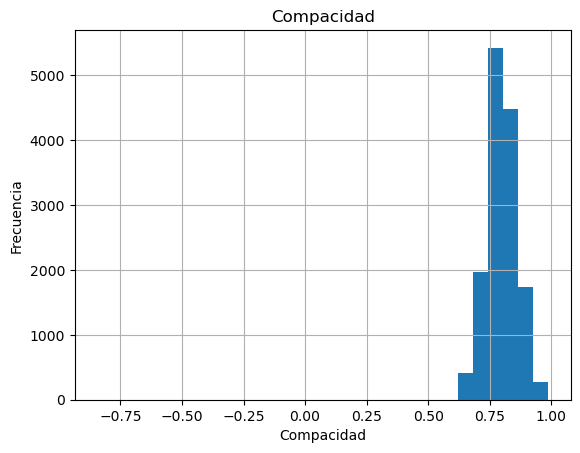

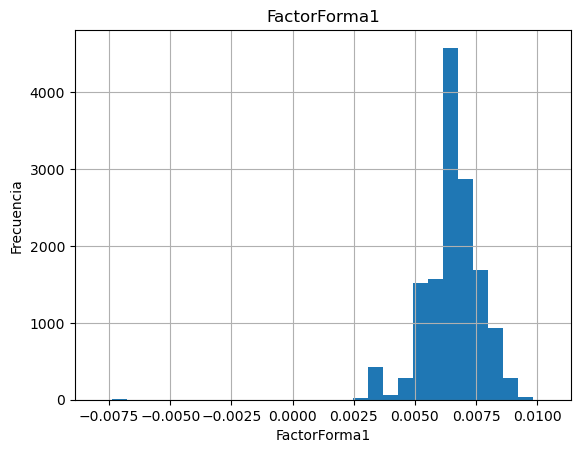

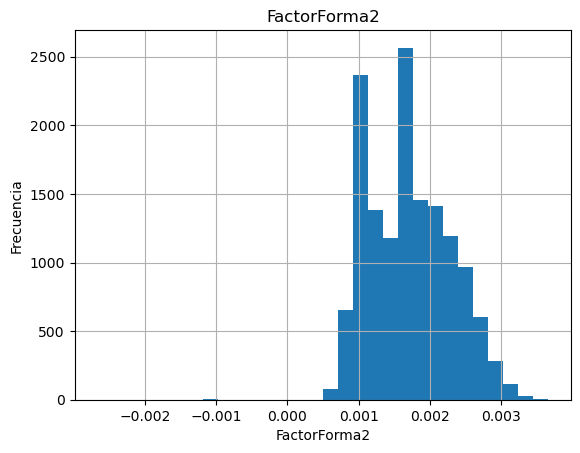

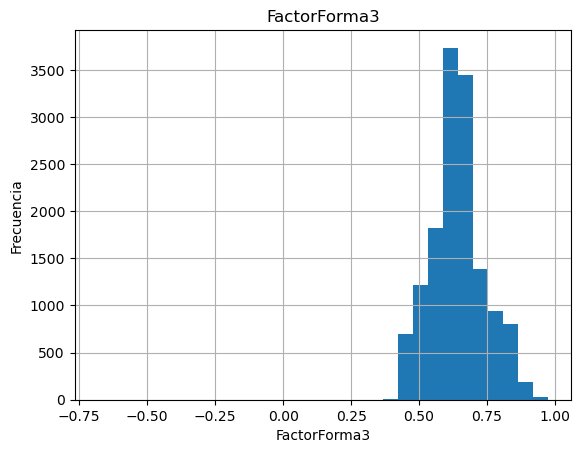

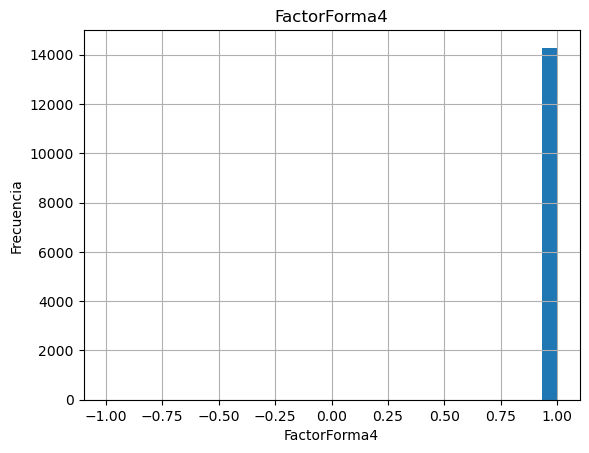

In [14]:
for c in dfPlots.columns:
    if c in dfPlots.columns and c != 'ID':
        dfPlots[c].hist(bins=30)
        plt.title(c)
        plt.xlabel(c)
        plt.ylabel('Frecuencia')
        plt.show()


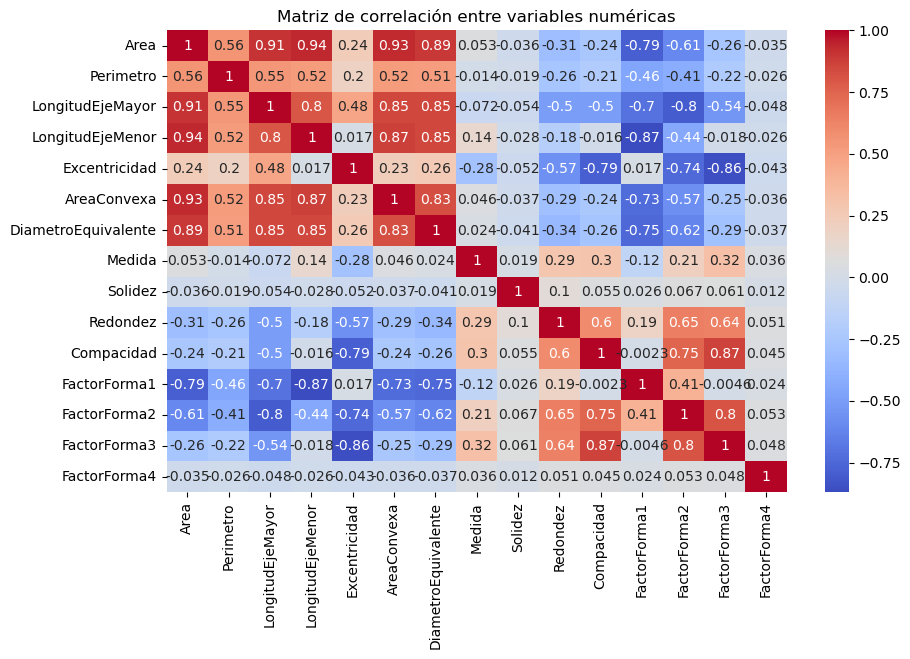

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = dfPlots.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()